In [1]:
import pandas as pd

# Cargar el archivo CSV
file_path = '/content/car_price_prediction.csv'
data = pd.read_csv(file_path)
data.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [2]:
# Ver el número total de filas y columnas
print(data.shape)

(19237, 18)


In [3]:
# Ver la información general sobre el dataset (tipos de datos, valores no nulos, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
# Ver estadísticas descriptivas (solo para columnas numéricas)
print(data.describe())

                 ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000


In [5]:
# Ver el número de valores únicos en cada columna
print(data.nunique())

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64


In [6]:
# Contar la cantidad de valores faltantes por columna
print(data.isnull().sum())

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [7]:
# 4. Revisar las columnas categóricas (no numéricas) y sus valores únicos
print("\nValores únicos en las columnas categóricas:")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()[:10]}")  # Muestra los primeros 10 valores únicos



Valores únicos en las columnas categóricas:
Levy: ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053']
Manufacturer: ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW']
Model: ['RX 450' 'Equinox' 'FIT' 'Escape' 'Santa FE' 'Prius' 'Sonata' 'Camry'
 'RX 350' 'E 350']
Category: ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine']
Leather interior: ['Yes' 'No']
Fuel type: ['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']
Engine volume: ['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3']
Mileage: ['186005 km' '192000 km' '200000 km' '168966 km' '91901 km' '160931 km'
 '258909 km' '216118 km' '398069 km' '128500 km']
Gear box type: ['Automatic' 'Tiptronic' 'Variator' 'Manual']
Drive wheels: ['4x4' 'Front' 'Rear']
Doors: ['04-May' '02-Mar' '>5']
Wheel: ['Left wheel' 'Right-hand drive']
Color: ['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Ora

In [8]:
# 5. Revisar si hay filas duplicadas
print("\n¿Existen filas duplicadas?:")
print(data.duplicated().sum())


¿Existen filas duplicadas?:
313


In [9]:
# Eliminar filas duplicadas
data = data.drop_duplicates()

In [10]:
# 5. Revisar si hay filas duplicadas
print("\n¿Existen filas duplicadas?:")
print(data.duplicated().sum())


¿Existen filas duplicadas?:
0


In [11]:
# Eliminar la unidad 'km' de la columna Mileage y convertir a tipo numérico
data['Mileage'] = data['Mileage'].str.replace(' km', '').replace('-', None).astype(float)

<ipython-input-11-f37bccb01a69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mileage'] = data['Mileage'].str.replace(' km', '').replace('-', None).astype(float)


In [12]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [13]:
# Convertir 'Price', 'Levy', 'Cylinders', y 'Engine volume' a valores numéricos, manejando entradas no válidas
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Levy'] = pd.to_numeric(data['Levy'], errors='coerce')
data['Cylinders'] = pd.to_numeric(data['Cylinders'], errors='coerce')
data['Engine volume'] = pd.to_numeric(data['Engine volume'], errors='coerce')

In [14]:
# Contar la cantidad de valores faltantes por columna
print(data.isnull().sum())

ID                     0
Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume       1892
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64


Se ha decidido rellenar los valores nulos de la columna **Levy** con **0** porque, en muchos casos, la ausencia de este dato puede indicar que el auto no está sujeto a ese impuesto o tarifa. Esto es más representativo que eliminar los datos o utilizar una estimación arbitraria.

En cuanto a la columna **Engine volume**, se ha rellenado con la **mediana** para mantener la integridad de los datos, ya que el tamaño del motor es un atributo clave del vehículo. La mediana es menos sensible a valores extremos, lo que evita distorsiones y asegura que los valores faltantes se aproximen a la mayoría de los autos del dataset.

Este enfoque mantiene la mayor cantidad posible de información sin comprometer la calidad del análisis.

In [15]:
# Rellenar valores nulos de 'Levy' con 0
data['Levy'].fillna(0, inplace=True)

# Rellenar valores nulos de 'Engine volume' con la mediana
data['Engine volume'].fillna(data['Engine volume'].median(), inplace=True)

# Verificar si los valores nulos han sido manejados
print(data.isnull().sum())

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [16]:
# Si deseas guardar el dataset limpio en un nuevo archivo CSV
output_path = '/content/car_price_prediction3.csv'
data.to_csv(output_path, index=False)

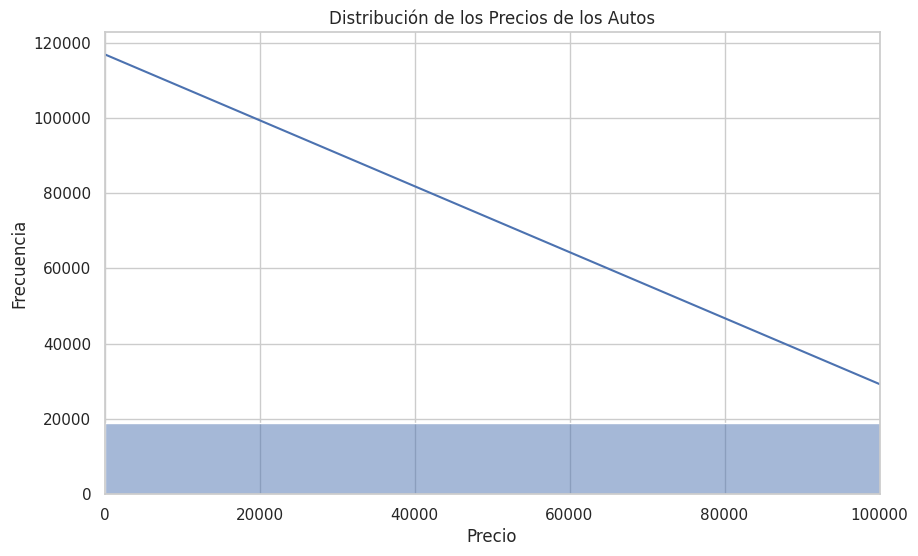

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer estilo para las visualizaciones
sns.set(style="whitegrid")

# 1. Distribución de los Precios de los Autos
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribución de los Precios de los Autos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xlim(0, 100000)  # Limitando el eje x para enfocarse en la mayoría de los datos
plt.show()

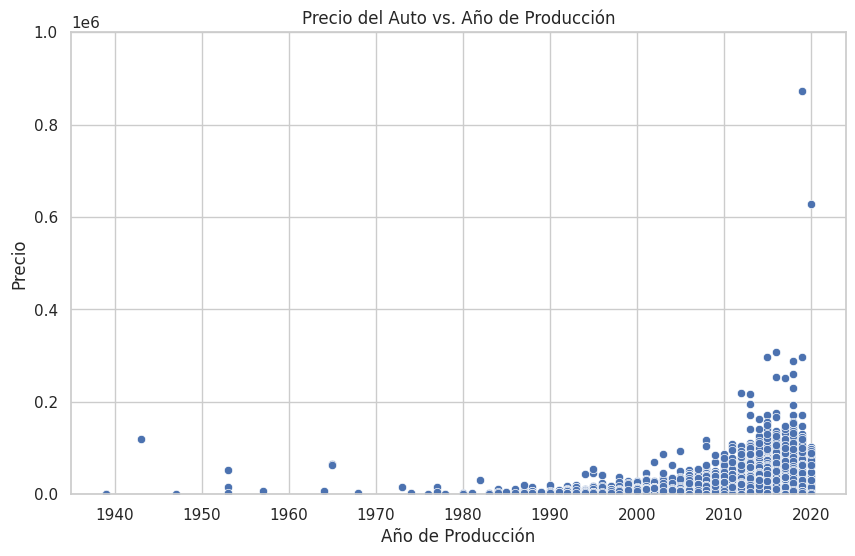

In [18]:
# 2. Año de Producción vs. Precio (Gráfico de dispersión)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Prod. year', y='Price', data=data)
plt.title('Precio del Auto vs. Año de Producción')
plt.xlabel('Año de Producción')
plt.ylabel('Precio')
plt.ylim(0, 1000000)  # Limitando el eje y para enfocarse en la mayoría de los datos
plt.show()


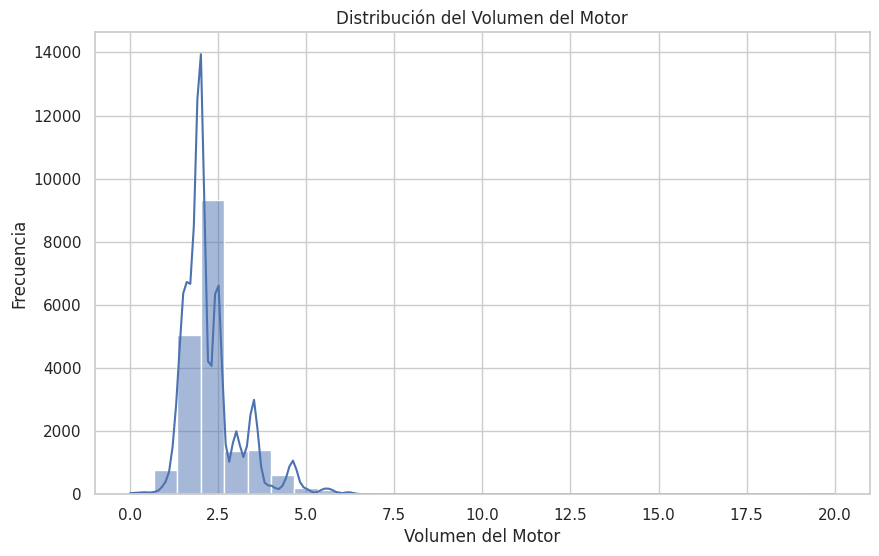

In [19]:
# 3. Distribución del Volumen del Motor
plt.figure(figsize=(10, 6))
sns.histplot(data['Engine volume'], bins=30, kde=True)
plt.title('Distribución del Volumen del Motor')
plt.xlabel('Volumen del Motor')
plt.ylabel('Frecuencia')
plt.show()

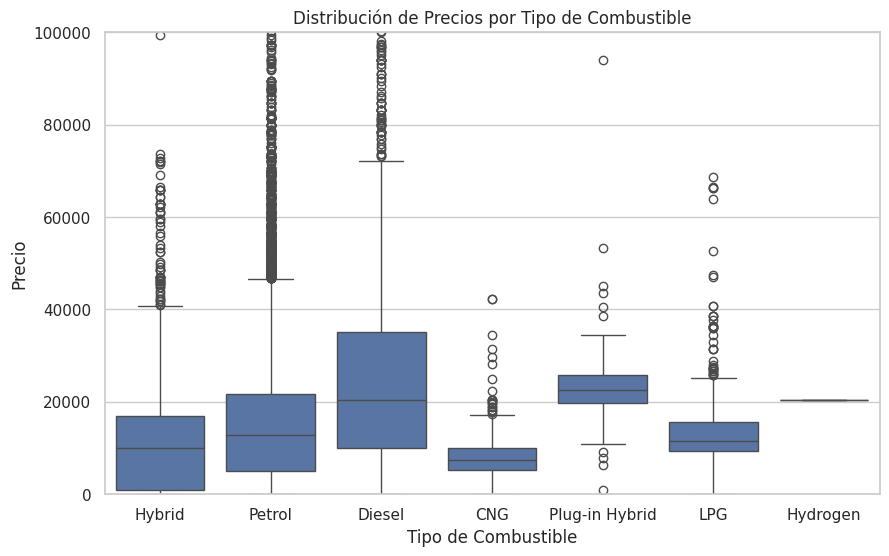

In [20]:
# 4. Precio del Auto según el Tipo de Combustible
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel type', y='Price', data=data)
plt.title('Distribución de Precios por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio')
plt.ylim(0, 100000)  # Limitando el eje y para enfocarse en la mayoría de los datos
plt.show()

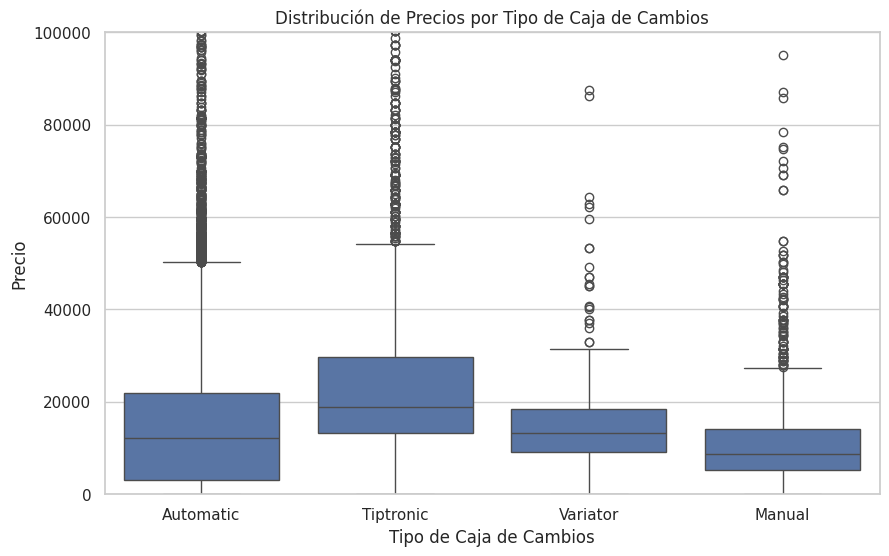

In [21]:
# 5. Precio del Auto según el Tipo de Caja de Cambios
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gear box type', y='Price', data=data)
plt.title('Distribución de Precios por Tipo de Caja de Cambios')
plt.xlabel('Tipo de Caja de Cambios')
plt.ylabel('Precio')
plt.ylim(0, 100000)  # Limitando el eje y para enfocarse en la mayoría de los datos
plt.show()

Principales hallazgos de las visualizaciones:

Distribución de los precios de los autos:

La mayoría de los precios de los autos están concentrados por debajo de $100,000, con una caída abrupta en la frecuencia a medida que el precio aumenta.
Hay algunos precios extremadamente altos, pero el enfoque principal está en autos asequibles.
Precio del auto vs. año de producción:

Los precios generalmente aumentan con los años de producción más recientes. Sin embargo, algunos modelos antiguos tienen precios más altos, probablemente debido a su estatus de lujo o autos clásicos.
La concentración de datos se encuentra alrededor de los años 2010-2020, lo que refleja que los autos modernos son más comunes en este conjunto de datos.
Distribución del volumen del motor:

La mayoría de los autos tienen volúmenes de motor entre 1.5 y 3 litros.
Existen algunos valores atípicos con volúmenes de motor de hasta 20 litros, lo que podría representar vehículos especializados o de lujo.
Precio del auto según el tipo de combustible:

Los autos híbridos y diésel tienden a tener una mayor variabilidad en sus precios, con los híbridos mostrando algunos de los precios más altos.
Los autos de gasolina tienen una distribución de precios más uniforme, mayormente en los rangos más bajos.
Precio del auto según el tipo de caja de cambios:

Los autos con cajas automáticas tienden a tener precios más altos en promedio, en comparación con aquellos con transmisiones manuales o de variador, lo que refleja quizá una preferencia por la comodidad en los autos modernos.

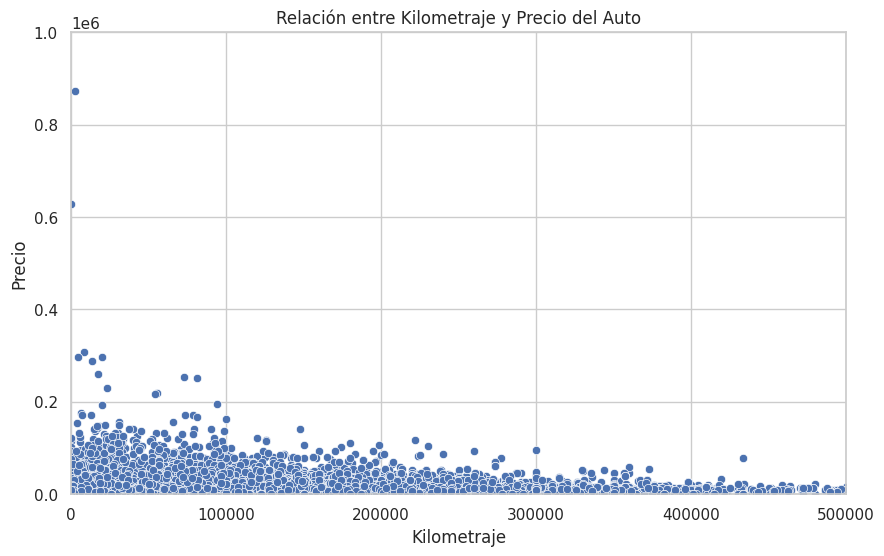

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=data)
plt.title('Relación entre Kilometraje y Precio del Auto')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.xlim(0, 500000)  # Limitar el kilometraje para evitar valores extremos
plt.ylim(0, 1000000)  # Limitar el precio
plt.show()

Relación entre kilometraje y precio:

No se observa una tendencia clara entre el kilometraje y el precio. Aunque existe una ligera relación negativa, hay muchos puntos dispersos. Esto sugiere que, además del kilometraje, otros factores importantes (como el tipo de vehículo, la marca, o el año de producción) también afectan el precio.

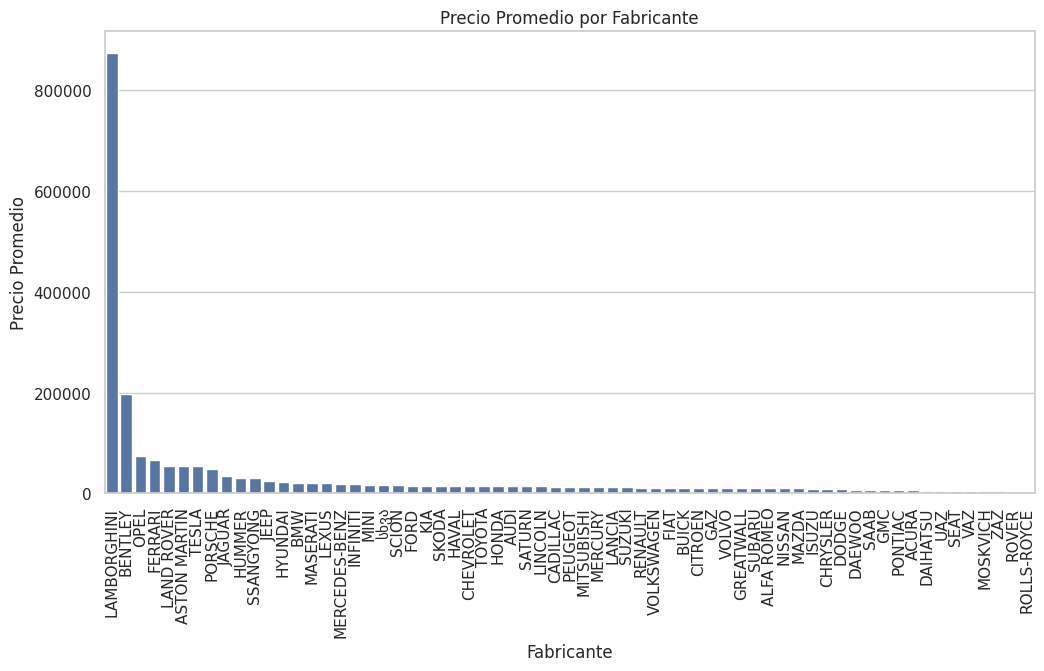

In [23]:
# Precio promedio por fabricante
plt.figure(figsize=(12, 6))
manufacturer_price = data.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=manufacturer_price.index, y=manufacturer_price.values)
plt.xticks(rotation=90)
plt.title('Precio Promedio por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Precio Promedio')
plt.show()


Precio promedio por fabricante:

Fabricantes como Tesla, Porsche, y Lexus tienen precios promedio significativamente más altos que marcas como Chevrolet y Ford.
Los resultados reflejan que los fabricantes de lujo tienden a mantener precios elevados, mientras que las marcas más accesibles tienen precios promedio más bajos.

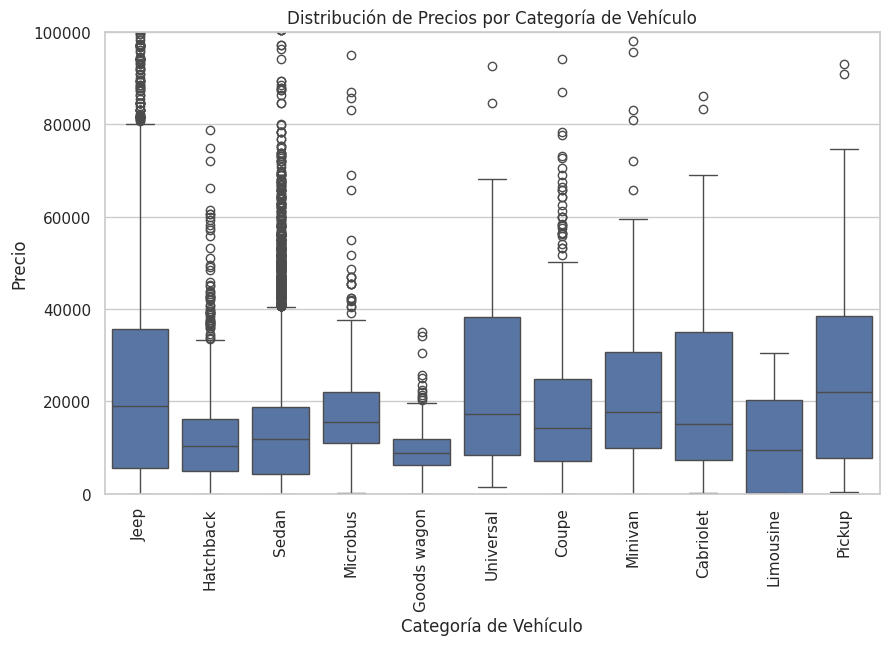

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=data)
plt.title('Distribución de Precios por Categoría de Vehículo')
plt.xlabel('Categoría de Vehículo')
plt.ylabel('Precio')
plt.ylim(0, 100000)  # Limitar el precio para enfocarnos en datos relevantes
plt.xticks(rotation=90)
plt.show()

Distribución de precios por categoría de vehículo:

Las categorías de autos de lujo como los Jeep y los Minivan muestran una amplia variación en el precio, lo que sugiere que estos tipos de vehículos pueden abarcar tanto autos de gama baja como alta.
En comparación, los Hatchback y Sedán tienden a tener precios más uniformes y generalmente más bajos.

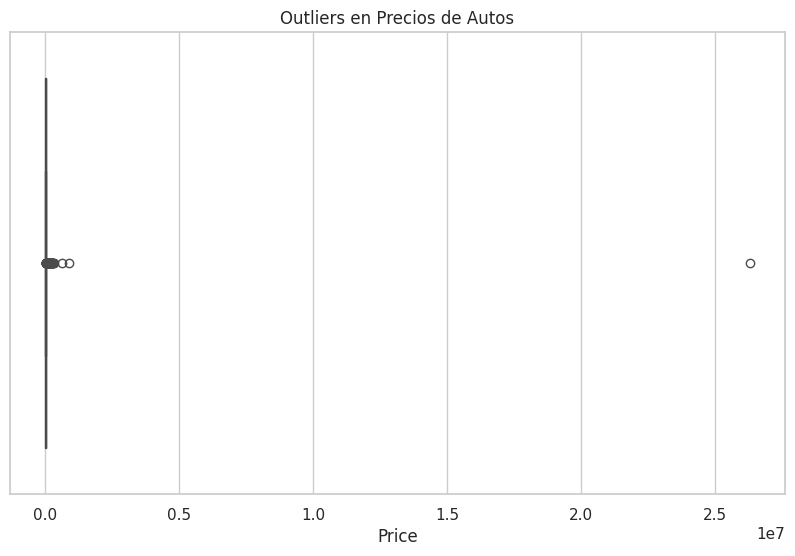

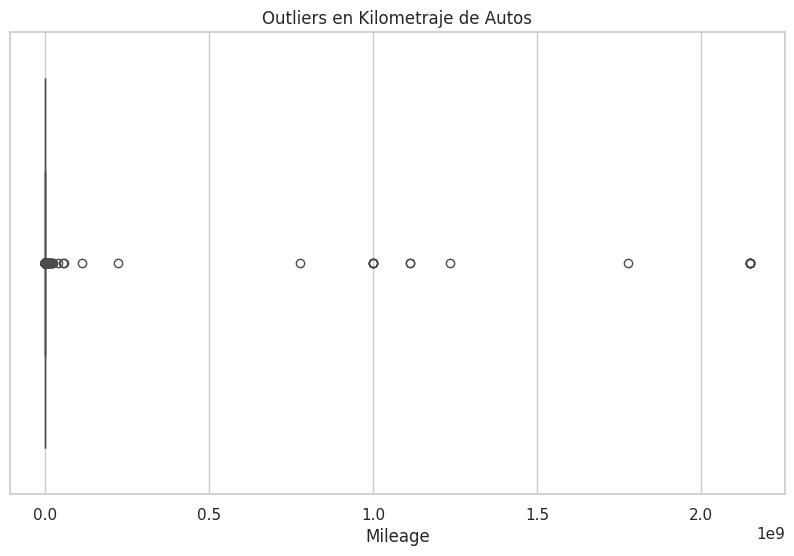

In [25]:
# Identificación de outliers en el precio
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', data=data)
plt.title('Outliers en Precios de Autos')
plt.show()

# Identificación de outliers en el kilometraje
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mileage', data=data)
plt.title('Outliers en Kilometraje de Autos')
plt.show()

Outliers en precios:

Hay varios valores atípicos en los precios, con algunos autos extremadamente caros. Esto puede incluir autos de lujo o vehículos personalizados que no siguen la tendencia promedio.

Outliers en kilometraje:

Existen algunos outliers extremos en el kilometraje. Algunos autos tienen kilometrajes excesivamente altos, lo que podría deberse a errores en los datos o a situaciones excepcionales (por ejemplo, autos de servicio pesado).

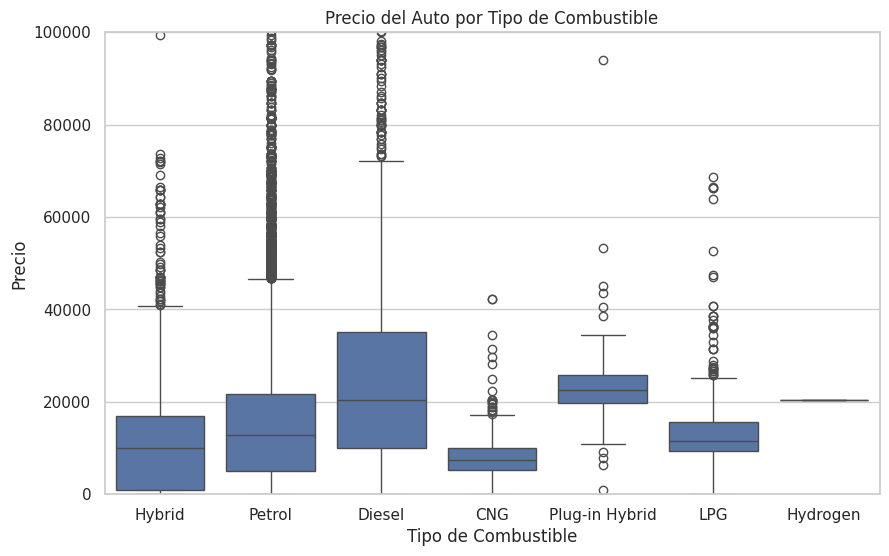

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel type', y='Price', data=data)
plt.title('Precio del Auto por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio')
plt.ylim(0, 100000)  # Limitar el precio
plt.show()

Precio por tipo de combustible:
De acuerdo con el análisis:

Los autos diésel tienen el precio promedio más alto, seguidos de los híbridos enchufables y los vehículos de hidrógeno.
Los autos de gasolina tienen un precio promedio de 17,391.
Sorprendentemente, los autos híbridos no tienen un precio tan alto como se esperaba, con un precio promedio de 10,845.

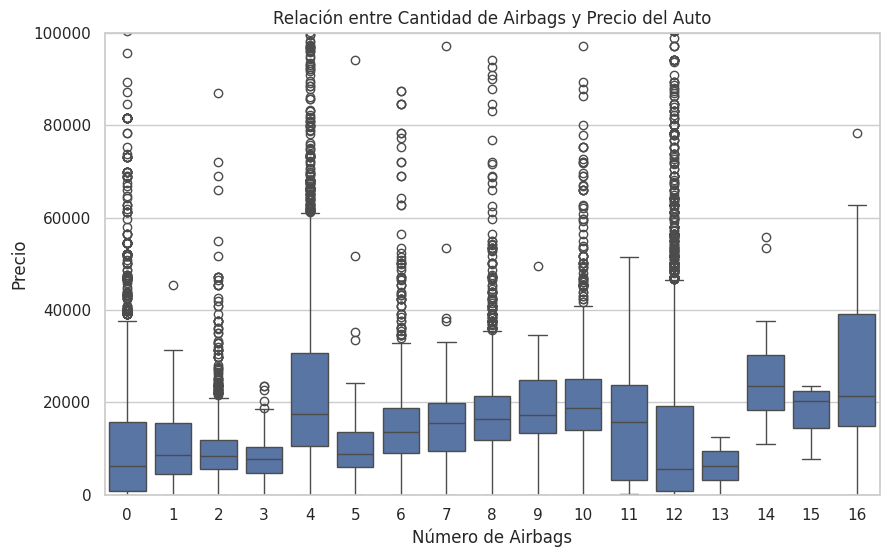

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airbags', y='Price', data=data)
plt.title('Relación entre Cantidad de Airbags y Precio del Auto')
plt.xlabel('Número de Airbags')
plt.ylabel('Precio')
plt.ylim(0, 100000)  # Limitar el precio
plt.show()

Para la relación entre el número de airbags y el precio, según el gráfico de caja y bigote que generamos anteriormente, las siguientes conclusiones pueden extraerse:

1. **Mayor número de airbags, precios más altos**:
   - En general, los autos con **más airbags** tienden a tener precios más altos. Esto es coherente con la idea de que los vehículos con más características de seguridad suelen ser más costosos.
   
2. **Distribución uniforme para ciertos valores**:
   - Los autos con **6 airbags** parecen ser muy comunes, con una distribución de precios amplia, lo que sugiere que este es un número típico de airbags para vehículos de gama media.
   - Los autos con **12 o más airbags** tienden a ser más caros, lo que indica que suelen pertenecer a vehículos de lujo o de alta gama.

3. **Precios bajos con pocos airbags**:
   - Los autos con **0 o 2 airbags** tienden a tener precios más bajos, lo cual es lógico ya que estos vehículos probablemente tienen menos características de seguridad y son modelos más económicos o antiguos.

4. **Variabilidad en los precios**:
   - Aunque en general más airbags se asocian con precios más altos, también hay bastante variabilidad dentro de cada grupo. Esto sugiere que, además del número de airbags, otros factores como el fabricante, la categoría del auto o el año de producción también tienen un impacto significativo en el precio.

En resumen, los resultados sugieren que un mayor número de airbags está correlacionado con precios más altos, pero no es el único factor determinante del precio.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = data

# Preprocesamiento: Codificación de variables categóricas
df_encoded = df.copy()

# Convertir las columnas categóricas en variables numéricas
label_encoders = {}
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['Price', 'ID'])  # Excluimos 'Price' (target) y 'ID'
y = df_encoded['Price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar los tres modelos

# 1. Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 2. Árbol de Decisión
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 3. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluar el rendimiento de los tres modelos
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# Comparar los modelos
evaluate_model(y_test, y_pred_lr, "Regresión Lineal")
evaluate_model(y_test, y_pred_dt, "Árbol de Decisión")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Regresión Lineal - MAE: 13114.01, RMSE: 19574.80, R²: -0.11
Árbol de Decisión - MAE: 5598.07, RMSE: 13970.75, R²: 0.44
Random Forest - MAE: 5420.91, RMSE: 22683.76, R²: -0.49


In [29]:
import joblib

# Supongamos que 'best_model' es el modelo que quieres guardar.
joblib.dump(dt_model, '/content/modelo.pkl')

['/content/modelo.pkl']

In [31]:
# Cargar el modelo
model = joblib.load('/content/modelo.pkl')

In [33]:
data5 = data.head(5)

In [38]:
features = data5[['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags']]

In [40]:
# Convertir las columnas categóricas en variables numéricas
label_encoders = {}
categorical_columns = data5.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    data5[col] = le.fit_transform(data5[col])
    label_encoders[col] = le

<ipython-input-40-f0841cb2a50f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5[col] = le.fit_transform(data5[col])
<ipython-input-40-f0841cb2a50f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5[col] = le.fit_transform(data5[col])
<ipython-input-40-f0841cb2a50f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [44]:
categorical_columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [42]:
# Realizar predicciones
predictions = model.predict(data5.drop(columns=['Price', 'ID']))

In [43]:
predictions

array([ 9565.,  9565.,  9408., 17876., 11917.])

In [35]:
# Si deseas guardar el dataset limpio en un nuevo archivo CSV
output_path = '/content/car_price_prediction5.csv'
data5.to_csv(output_path, index=False)

Conclusión:
El Árbol de Decisión es el modelo que mejor predice el precio de los autos, ya que tiene el menor error absoluto medio (MAE) y un
𝑅
2
R
2
  positivo, lo que indica que explica mejor la variabilidad en los precios.
Aunque el Random Forest generalmente supera a los árboles de decisión, en este caso, su configuración no fue óptima y dio un rendimiento peor.
La Regresión Lineal no es adecuada para este problema, dado que no captura bien las relaciones no lineales entre las características y el precio.

Para mejorar el rendimiento del modelo de Random Forest, ajustaremos algunos hiperparámetros clave, como el número de árboles (n_estimators), la profundidad máxima del árbol (max_depth), y el número mínimo de muestras por hoja (min_samples_leaf). Además, podemos probar otros enfoques como la validación cruzada para asegurar que el modelo no se sobreajuste.

Estrategia de ajuste de hiperparámetros:
Grid Search: Se probarán diferentes combinaciones de hiperparámetros para encontrar la mejor configuración.
Validación cruzada: Usaremos validación cruzada para obtener una mejor estimación del rendimiento general del modelo.

In [30]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir el grid de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],         # Número de árboles en el bosque
    'max_depth': [10, 20, 30, None],         # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],         # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],           # Mínimo de muestras en una hoja
    'bootstrap': [True, False]               # Si se usa muestreo con reemplazo
}

# Usar GridSearchCV para probar todas las combinaciones de hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Predecir con el mejor modelo
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluar el mejor modelo
evaluate_model(y_test, y_pred_best_rf, "Mejor Random Forest")

Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 